## Import Libraries

In [40]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import scikitplot as skplt




## Loading Data

In [41]:
reading_data = "C:/Users/ADMIN/Desktop/Datasets/diabetes.csv"
data = pd.read_csv(reading_data)

## Exploring Data

In [42]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [45]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

c:\Users\ADMIN\Documents\Diabetes-Prediction-Application\venv\lib\site-packages\seaborn\distributions.py:269: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  baselines.iloc[:, cols] = (curves


<AxesSubplot: xlabel='BMI', ylabel='Count'>

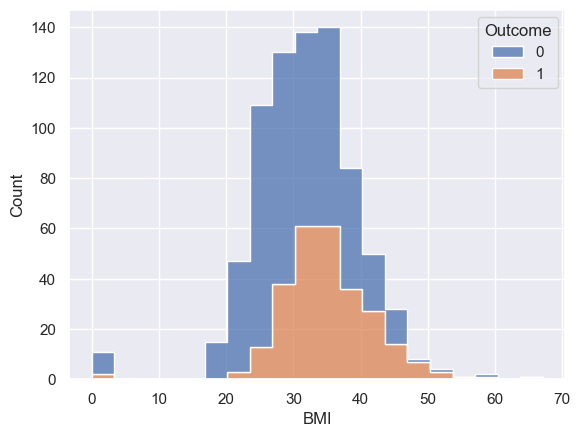

In [46]:
# Relating BMI with outcome
sns.histplot(data=data, x="BMI", bins=20, hue="Outcome", multiple="stack", element="step")

<AxesSubplot: xlabel='Age', ylabel='BMI'>

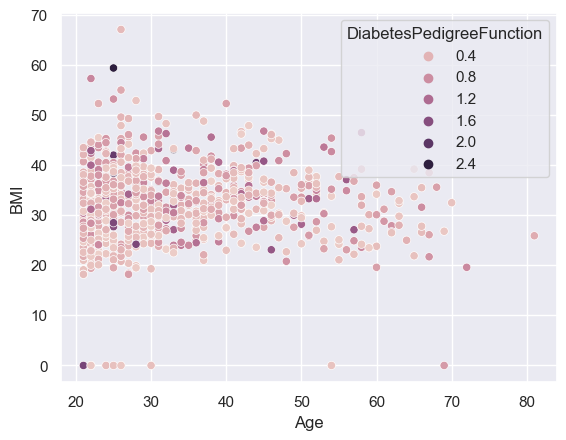

In [47]:
# BMI vs Pedigree Function
sns.set_theme()
sns.scatterplot(data=data, x = "Age", y="BMI", hue="DiabetesPedigreeFunction")

#### Detecting Outliers - BMI

<AxesSubplot: xlabel='BMI', ylabel='Count'>

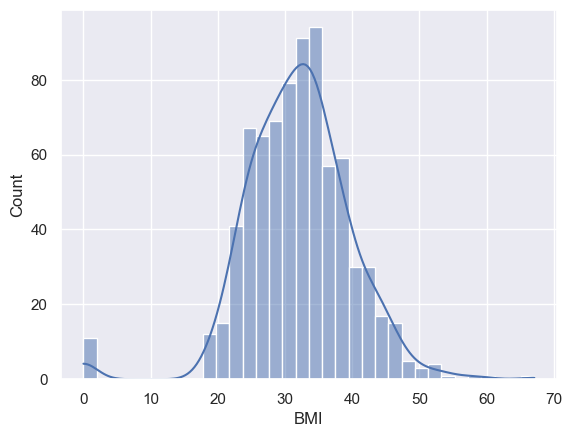

In [48]:
# Histogram plot for BMI
sns.histplot(data=data, x="BMI", kde=True)

<AxesSubplot: xlabel='BMI'>

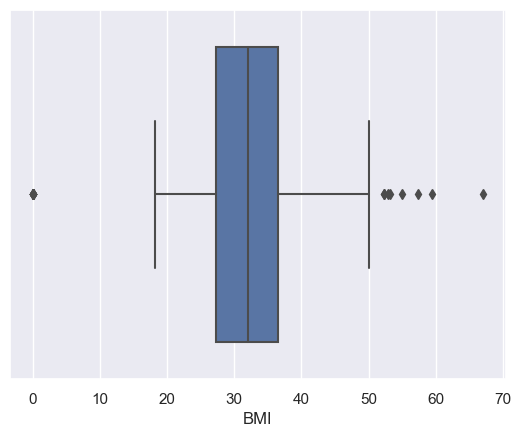

In [49]:
# Boxplot for BMI
sns.boxplot(data=data, x="BMI")

In [50]:
# Removing Outliers
min_threshold, max_threshold= data.BMI.quantile([0.02, 0.99])
min_threshold, max_threshold
type(min_threshold)

float

In [51]:
data[data.BMI>max_threshold]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162,76,56,100,53.2,0.759,25,1
125,1,88,30,42,99,55.0,0.496,26,1
177,0,129,110,46,130,67.1,0.319,26,1
193,11,135,0,0,0,52.3,0.578,40,1
247,0,165,90,33,680,52.3,0.427,23,0
303,5,115,98,0,0,52.9,0.209,28,1
445,0,180,78,63,14,59.4,2.420,25,1
673,3,123,100,35,240,57.3,0.880,22,0


In [52]:
data = data[(data.BMI>min_threshold) & (data.BMI<max_threshold)]
data.shape

(744, 9)

<AxesSubplot: xlabel='BMI', ylabel='Count'>

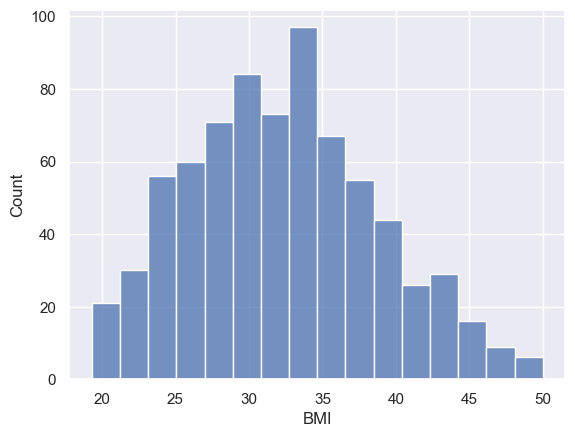

In [53]:
sns.histplot(data=data, x="BMI")

<AxesSubplot: xlabel='Outcome', ylabel='count'>

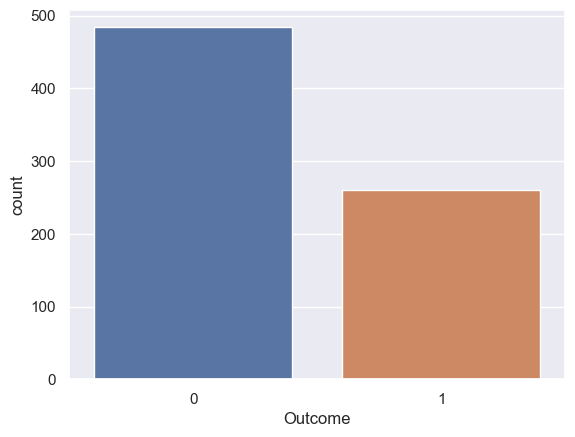

In [54]:
#Checking total OUTCOME values
sns.countplot(data=data, x="Outcome")

## Train Data

In [55]:
# Separating the target variable
X = data.drop("Outcome", axis=1)
Y = data["Outcome"]
#Splitting the target variable
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=100)
#Training  Data
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

c:\Users\ADMIN\Documents\Diabetes-Prediction-Application\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Make Predictions

In [56]:
predictions = logmodel.predict(X_test)
predictions[:5]

array([1, 1, 0, 0, 0], dtype=int64)

## Checking Accuracy Score

In [57]:
accuracy_score(y_test, predictions)

0.8035714285714286

## Confusion Matrix

<AxesSubplot: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

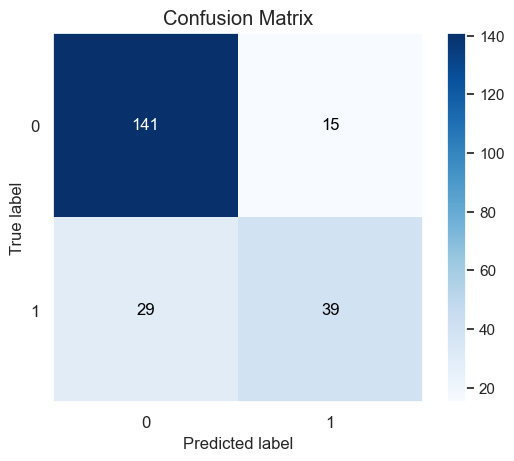

In [58]:
skplt.metrics.plot_confusion_matrix(y_test, predictions)